In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

 0 t_shirt, 1 trouser 2 pullover 3 dress 4 coat 5 sandal 6 shirt 7 sneaker 8 bag 9 ankle boot

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [38]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

0


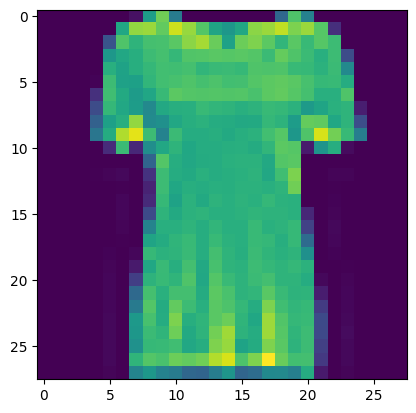

In [39]:
import matplotlib.pyplot as plt

idx = 10
plt.imshow(x_train[idx])
print(y_train[idx])  # class 

Preprocessing

In [40]:
import numpy as np

np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [41]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [42]:
x_train = x_train/255
x_test = x_test/255

x_train[0] ##, x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
np.min(x_train), np.max(x_train)

(np.float64(0.0), np.float64(1.0))

Mode definition

dense layer - general deep learning model

In [49]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # max:1 , min:0

In [ ]:
model.compile(tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
hist = model.fit(x_train, y_train, epochs= 500, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7048 - loss: 0.9043 - val_accuracy: 0.8312 - val_loss: 0.4724
Epoch 2/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8479 - loss: 0.4159 - val_accuracy: 0.8565 - val_loss: 0.4047
Epoch 3/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8717 - loss: 0.3506 - val_accuracy: 0.8547 - val_loss: 0.3904
Epoch 4/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8782 - loss: 0.3238 - val_accuracy: 0.8747 - val_loss: 0.3428
Epoch 5/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8893 - loss: 0.2972 - val_accuracy: 0.8763 - val_loss: 0.3528
Epoch 6/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8922 - loss: 0.2872 - val_accuracy: 0.8744 - val_loss: 0.3494
Epoch 7/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9002 - loss: 0.2693 - val_accuracy: 0.8827 - val_loss: 0.3364
Epoch 8/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9065 - loss: 0.2489 - val_accu

# CNN Model

In [67]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, (5,5), input_shape = (28,28,1), padding='same', activation = 'relu' ))
model1.add(keras.layers.MaxPool2D())
model1.add(keras.layers.Conv2D(128, (3,3), activation = 'relu' ))
model1.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model1.add(keras.layers.Conv2D(64, (3,3), input_shape = (28,28,1), padding='same', activation = 'relu' ))
model1.add(keras.layers.MaxPool2D())
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))



/Users/taktakro/Desktop/MLProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model1.compile(optimizer=tf._optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [71]:
model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,970 (941.29 KB)

 Trainable params: 240,970 (941.29 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
hist1 = model1.fit(x_train, y_train, epochs = 500, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.5695 - loss: 1.2020 - val_accuracy: 0.7693 - val_loss: 0.6057
Epoch 2/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.8120 - loss: 0.5078 - val_accuracy: 0.8342 - val_loss: 0.4552
Epoch 3/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.8458 - loss: 0.4245 - val_accuracy: 0.8527 - val_loss: 0.4178
Epoch 4/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.8666 - loss: 0.3666 - val_accuracy: 0.8573 - val_loss: 0.3933
Epoch 5/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.8817 - loss: 0.3302 - val_accuracy: 0.8782 - val_loss: 0.3389
Epoch 6/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.8880 - loss: 0.3066 - val_accuracy: 0.8836 - val_loss: 0.3343
Epoch 7/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.8930 - loss: 0.2917 - val_accuracy: 0.8801 - val_loss: 0.3215
Epoch 8/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8990 -

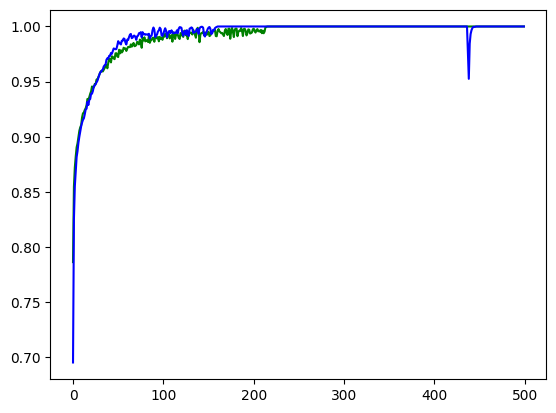

In [73]:
plt.plot(hist.history['accuracy'], color = 'green')
plt.plot(hist1.history['accuracy'], color = 'blue')

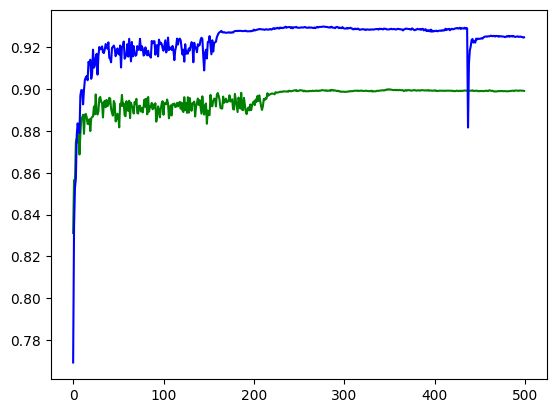

In [74]:
plt.plot(hist.history['val_accuracy'], color = 'green')
plt.plot(hist1.history['val_accuracy'], color = 'blue')

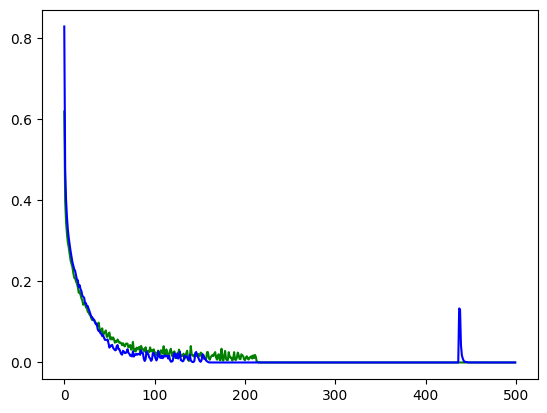

In [75]:
plt.plot(hist.history['loss'], color = 'green')
plt.plot(hist1.history['loss'], color = 'blue')

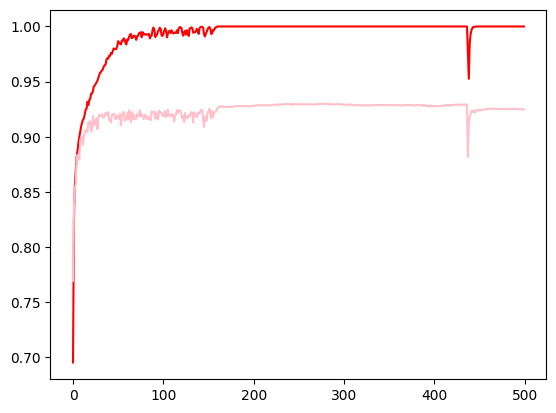

In [76]:
plt.plot(hist1.history['accuracy'], color = 'red')
plt.plot(hist1.history['val_accuracy'], color = 'pink')